#  Singlet Scalar Singlet (charged) fermion dark matter model
* [arXiv:1307.6181](https://arxiv.org/abs/1307.6181)
* [arXiv:1307.6480](https://arxiv.org/abs/1307.6480)
## Particle content

In [61]:
%%latex
\begin{array}{llllll}
\text{Name} & \text{Symbol} & \text{SU}(3)_c & \text{SU}(2)_L & \text{U}(1)_Y & Z_2 \\ \hline
 \begin{pmatrix}\nu_L & e_L\end{pmatrix}^{\operatorname{T}}&
\begin{pmatrix}\xi_{1\alpha} & \xi_{2\alpha} \end{pmatrix}^{\operatorname{T}}& \mathbf{1} & \mathbf{2} & -1/2 & +1\\
(e_R)^{\dagger} & \eta^{\alpha}_1 & \mathbf{1} & \mathbf{1} & +1 & +1 \\
(\psi_R)^{\dagger} & \eta^{\alpha}_2 & \mathbf{1} & \mathbf{1} & +1 & -1 \\
\psi_L & \xi_{3\alpha} & \mathbf{1} & \mathbf{1} & -1 & -1 \\
\end{array}

<IPython.core.display.Latex object>

After the spontaneous symmetry breaking, the relevant Yukawa terms are
\begin{align}
  \mathcal{L}=&\frac{h_e v}{\sqrt{2}} \left( \eta^{\alpha}_1 \xi_{2\alpha} + \xi_{2\dot{\alpha}}^{\dagger} \eta^{\dagger\dot{\alpha}}_1   \right)+ M_{\psi} \left(  \eta^{\alpha}_2 \xi_{3\alpha}+  \xi_{3\dot{\alpha}}^{\dagger}\eta^{\dagger\dot{\alpha}}_2 \right) + h_S \left(S \eta^{\alpha}_1 \xi_{3\alpha}
 + S\xi_{3\dot{\alpha}}^{\dagger} \eta^{\dagger\dot{\alpha}}_1   \right) 
\nonumber\\
      =&\frac{h_e v}{\sqrt{2}}
      \begin{pmatrix}
       \eta^{\alpha}_1 &  \xi_{2\dot{\alpha}}^{\dagger} 
      \end{pmatrix}
      \begin{pmatrix}
        \xi_{2\alpha} \\
         \eta^{\dagger\dot{\alpha}}_1 
      \end{pmatrix}+M_{\psi}\begin{pmatrix}
       \eta^{\alpha}_2 &  \xi_{3\dot{\alpha}}^{\dagger} 
      \end{pmatrix}
      \begin{pmatrix}
        \xi_{3\alpha} \\
         \eta^{\dagger\dot{\alpha}}_2 
      \end{pmatrix}
       +\left[ h_S S\begin{pmatrix}
       \eta^{\alpha}_1 &  \xi_{2\dot{\alpha}}^{\dagger} 
      \end{pmatrix}
      \begin{pmatrix}
        1 & 0 \\
        0 & 0\\        
      \end{pmatrix}
      \begin{pmatrix}
        \xi_{3\alpha} \\
         \eta^{\dagger\dot{\alpha}}_2 
      \end{pmatrix} +\text{h.c} \right]
     \nonumber\\
      =&\frac{h_e v}{\sqrt{2}}
      \begin{pmatrix}
     \xi_{2\dot{\alpha}}^{\dagger} & \eta^{\alpha}_1
      \end{pmatrix}
      \begin{pmatrix}
       0 & 1\\
       1 & 0        
      \end{pmatrix}
      \begin{pmatrix}
        \xi_{2\alpha} \\
         \eta^{\dagger\dot{\alpha}}_1 
      \end{pmatrix}
+M_{\psi}\begin{pmatrix}
       \xi_{3\dot{\alpha}}^{\dagger}  & \eta^{\alpha}_2 
      \end{pmatrix}
      \begin{pmatrix}
       0 & 1\\
       1 & 0        
      \end{pmatrix}
      \begin{pmatrix}
        \xi_{3\alpha} \\
         \eta^{\dagger\dot{\alpha}}_2 
      \end{pmatrix}\nonumber\\
&+\left[ h_S S\begin{pmatrix}
       \xi_{2\dot{\alpha}}^{\dagger}  & \eta^{\alpha}_1
      \end{pmatrix}
      \begin{pmatrix}
       0 & 1\\
       1 & 0        
      \end{pmatrix}
      \begin{pmatrix}
       1 & 0\\
       0 & 0        
      \end{pmatrix}
      \begin{pmatrix}
        \xi_{3\alpha} \\
         \eta^{\dagger\dot{\alpha}}_2 
      \end{pmatrix}+\text{h.c}  \right]
     \nonumber
\end{align}
Defining
\begin{align}
  e=&  \begin{pmatrix}
        \xi_{2\alpha} \\
         \eta^{\dagger\dot{\alpha}}_1 
      \end{pmatrix}=
      \begin{pmatrix}
        e_L\\
        e_R
      \end{pmatrix}& \Psi= \begin{pmatrix}
        \xi_{3\alpha} \\
         \eta^{\dagger\dot{\alpha}}_2 
      \end{pmatrix}=
      \begin{pmatrix}
          \psi_L\\
          \psi_R        
      \end{pmatrix}
\end{align}
the relevant Yukawa Lagrangian in terms of Dirac fermions is
\begin{align}
  \mathcal{L}=&\frac{h_e v}{\sqrt{2}} e^{\dagger}\gamma^{0}e + M_{\psi} \Psi^{\dagger}\gamma^{0}\Psi
       + \left( h_S S e^{\dagger} \gamma^0 P_L \Psi + \text{h.c} \right)
\nonumber\\
      =&\frac{h_e v}{\sqrt{2}} \overline{e}e+M_{\psi}\overline{\Psi}\Psi+h_S \left(S\, \overline{e} \Psi_L+\text{h.c} \right)\,,
\end{align}
where
\begin{align}
  \Psi_L=P_L\Psi=
  \begin{pmatrix}
    \psi_L\\
    0
  \end{pmatrix}\,.
\end{align}

The Inert Zee model extended with a scalar (neutral) singlet, give rise to the model T1-1-C with $\alpha=1$. A triplet fermion gives an additional contribution as in the Triplet-Doublet fermion DM model, which is like the SDFDM with scalar singlet but with the fermion triplet playing the role of the singlet. The triplet fermion gives in addition a radiative type-III seesaw topology. 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [159]:
import pandas as pd
import numpy as np
from matplotlib.colors import LogNorm
import os, sys, inspect
import commands
from hep import *


## Check one point

In [3]:
a=hep(MODEL='SimplifiedDMSSSFDM')

`a-object` is an object with many attributes and methods. Use the tab to explore them. Some of them are
* a.Series: [pandas](http://pandas.pydata.org/) Series object with the "relevant" variables 
* a.LHA: Input LesHouces file as [pyslha](https://pypi.python.org/pypi/pyslha/) object
* a.runSPheno() -> a.LHA_out: return LHA output files as [pyslha](https://pypi.python.org/pypi/pyslha/) object
* a.runmicromegas() -> a.runSPheno() -> Updated the `a-object`  with micrOMEGAS "relevant" output

In [4]:
pd.Series(a.LHA.blocks['MINPAR'].entries)

1    2.8000000E-01  # Lambda1IN
2      1.0000000E-02  # LamSHIN
3       0.0000000E+00  # LamSIN
4      2.0000000E+02  # MSinput
5     4.0000000E+02  # MDFinput
dtype: object

In [5]:
a.LHA.blocks['SPHENOINPUT'].entries[520]

'1.             # Write effective Higgs couplings (HiggsBounds blocks): put 0 to use file with MadGraph! '

In [6]:
pd.Series(a.LHA.blocks['YSIN'].entries)

1    0.000000E+00   # Ys(1)
2    0.000000E+00   # Ys(2)
3    0.000000E+00   # Ys(3)
dtype: object

In [51]:
v=a.vev
lambda_1=0.26
lambda_SH=0.1
MS=200**2
MF=265
Yse=0
Ymu=2
Ytau=0
devnull=commands.getoutput('rm -f SPheno.spc.%s' %a.MODEL)
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
a.LHA.blocks['SPHENOINPUT'].entries[520]='0.             # Write effective Higgs couplings (HiggsBounds blocks): put 0 to use file with MadGraph! '
a.LHA.blocks['MINPAR'][1]='%0.8E       # lambda1'  %lambda_1
a.LHA.blocks['MINPAR'][2]='%0.8E       # lambdaSH'  %lambda_SH
a.LHA.blocks['MINPAR'][4]='%0.8E       # MS'  %MS
a.LHA.blocks['MINPAR'][5]='%0.8E       # MF' %MF
a.LHA.blocks['YSIN'][1]='%0.8E       # Ys(1)' %Yse
a.LHA.blocks['YSIN'][2]='%0.8E       # Ys(1)' %Ymu
a.LHA.blocks['YSIN'][3]='%0.8E       # Ys(3)' %Ytau
moc=a.runmicromegas(Direct_Detection=True)
print 'Omega h^2, SI proton, neutron =',a.Series.Omega_h2,a.Series.proton_SI,a.Series.neutron_SI,a.Series.sigmav

Omega h^2, SI proton, neutron = 0.0127 4.516e-09 4.643e-09 2.15e-25


In [52]:
pd.Series(a.LHA_out_with_comments.blocks['MASS'].entries)

25             1.25548349E+02 # hh
6666635        2.14621660E+02 # ss
23             9.11887000E+01 # VZ
24            8.03497269E+01 # VWp
1            5.00000000E-03 # Fd_1
3            9.50000000E-02 # Fd_2
5            4.18000000E+00 # Fd_3
2            2.50000000E-03 # Fu_1
4            1.27000000E+00 # Fu_2
6            1.73500000E+02 # Fu_3
11           5.10998930E-04 # Fe_1
13           1.05658372E-01 # Fe_2
15           1.77669000E+00 # Fe_3
210000601     2.65000000E+02 # Fre
dtype: object

In [56]:
MS2=200**2

214.62165981905724

In [30]:
print moc


Masses of odd sector Particles:
~Ss  : MSs   =   200.0 || ~Re  : MRe   =   265.0 || 
Xf=2.46e+01 Omega h^2=1.55e-01

# Channels which contribute to 1/(omega) more than 1%.
# Relative contributions in % are displayed
   99% ~Ss ~Ss ->e2 E2 

==== Calculation of CDM-nucleons amplitudes  =====
         TREE LEVEL
CDM-nucleon micrOMEGAs amplitudes:
proton:  SI  0.000E+00  SD  0.000E+00
neutron: SI  0.000E+00  SD  0.000E+00
         BOX DIAGRAMS
CDM-nucleon micrOMEGAs amplitudes:
proton:  SI  0.000E+00  SD  0.000E+00
neutron: SI  0.000E+00  SD  0.000E+00
CDM-nucleon cross sections[pb]:
 proton  SI 0.000E+00  SD 0.000E+00
 neutron SI 0.000E+00  SD 0.000E+00

======== Direct Detection ========
73Ge: Total number of events=0.00E+00 /day/kg
Number of events in 10 - 50 KeV region=0.00E+00 /day/kg
131Xe: Total number of events=0.00E+00 /day/kg
Number of events in 10 - 50 KeV region=0.00E+00 /day/kg
23Na: Total number of events=0.00E+00 /day/kg
Number of events in 10 - 50 KeV region=0.00E+00 /day

In [6]:
pd.Series(a.LHA_oua.LHA.blocks['YSIN'][1]='%0.8E       # Ys(1)' %Yset_with_comments.blocks['MASS'].entries)

25             1.25548349E+02 # hh
6666635        9.90000000E+01 # ss
23             9.11887000E+01 # VZ
24            8.03497269E+01 # VWp
1            5.00000000E-03 # Fd_1
3            9.50000000E-02 # Fd_2
5            4.18000000E+00 # Fd_3
2            2.50000000E-03 # Fu_1
4            1.27000000E+00 # Fu_2
6            1.73500000E+02 # Fu_3
11           5.10998930E-04 # Fe_1
13           1.05658372E-01 # Fe_2
15           1.77669000E+00 # Fe_3
210000601     2.00000000E+02 # Fre
dtype: object

## Scan $m_{F}$

In [7]:
df=pd.DataFrame(np.logspace(np.log10(100),np.log10(1200),100))
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
df_masses=np.logspace(np.log10(100),np.log10(1200),100)
for MF in df_masses:
    if np.where(df_masses==MF)[0][0]%10==0: #find the index of the array entry
        print np.where(df_masses==MF)[0][0]
    a.LHA.blocks['MINPAR'][5]='%0.8E       #MF' %MF  # -> Fill a.Series.MDF
    a.runmicromegas(Direct_Detection=True)
    df=df.append(a.Series,ignore_index=True)

0
10
20
30
40
50
60
70
80
90


### Relic density

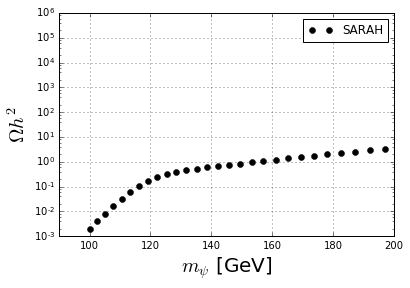

In [9]:
plt.semilogy(df.MF,df.Omega_h2,'ko',label='SARAH')
plt.xlabel(r'$m_\psi$ [GeV]',size=20)
plt.ylabel(r'$\Omega h^2$',size=20)
plt.grid()
plt.xlim(90,200)
plt.legend(loc='best')
#plt.savefig('omega.pdf')

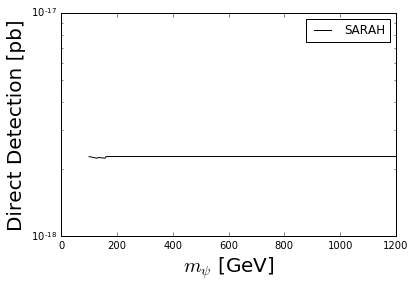

In [27]:
plt.semilogy(df.MF,df.proton_SI,'k-',label='SARAH')
plt.xlabel(r'$m_\psi$ [GeV]',size=20)
plt.ylabel(r'Direct Detection [pb]' ,size=20)
plt.legend(loc='best')
#plt.savefig('dd.pdf')

## Full scan

In [257]:
v=a.vev
Omega_h2_delta=0.01
CL=3
Omega_h2=0.12
Omega_h2_exp=[Omega_h2-CL*Omega_h2_delta,Omega_h2,Omega_h2+CL*Omega_h2_delta]
lambda_1=0.26
lambda_SH=0
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
a.LHA.blocks['SPHENOINPUT'].entries[520]='0.             # Write effective Higgs couplings (HiggsBounds blocks): put 0 to use file with MadGraph! '

df=pd.DataFrame()
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
df_masses=np.logspace(np.log10(100),np.log10(1E4),1000) #np.array([200])
for i in range(1):
    for MF in df_masses:
        rm1=10**np.random.uniform(np.log10(1E-2),np.log10(3))
        r=rm1+1.
        M_S=MF/r
        MS2=M_S**2-a.vev**2*lambda_SH
        Yse_range=np.logspace(np.log10(np.pi),np.log10(1E-3),50)
        for Yse in Yse_range:
            devnull=commands.getoutput('rm -f SPheno.spc.%s' %a.MODEL)
            Ymu=0. #10**np.random.uniform( log10(1E-3),np.log10(np.pi) )
            Ytau=0. #10
            a.LHA.blocks['MINPAR'][1]='%0.8E       # lambda1'  %lambda_1
            a.LHA.blocks['MINPAR'][2]='%0.8E       # lambdaSH'  %lambda_SH
            a.LHA.blocks['MINPAR'][4]='%0.8E       # MS2'  %MS2
            a.LHA.blocks['MINPAR'][5]='%0.8E       # MF' %MF
            a.LHA.blocks['YSIN'][1]='%0.8E       # Ys(1)' %Yse
            a.LHA.blocks['YSIN'][2]='%0.8E       # Ys(2)' %Ymu
            a.LHA.blocks['YSIN'][3]='%0.8E       # Ys(3)' %Ytau        
            a.LHA.blocks['MINPAR'][5]='%0.8E       #MF' %MF  # -> Fill a.Series.MDF
            a.runmicromegas(Direct_Detection=True)
            if a.Series.Omega_h2>Omega_h2_exp[0] and a.Series.Omega_h2<Omega_h2_exp[2]: 
                a.Series=a.Series.append(block_to_series(a.LHA_out_with_comments.blocks['MASS']))
                kk=a.branchings(a.LHA_out.decays,min_pdg=25)
                a.Series=a.Series.append(a.Br_names)
                df=df.append(a.Series,ignore_index=True)
            if a.Series.Omega_h2>Omega_h2_exp[2]: 
                break
                
        if np.where(df_masses==MF)[0][0]%100==0: #find the index of the array entry
            print np.where(df_masses==MF)[0][0]

0
100
200
300
400
500
600
700
800
900


In [165]:
df.to_excel('sssfdm.xlsx')

In [267]:
df=pd.read_excel('sssfdm.xlsx')

In [268]:
df.shape

(903, 72)

(50, 7307.1845499999999)

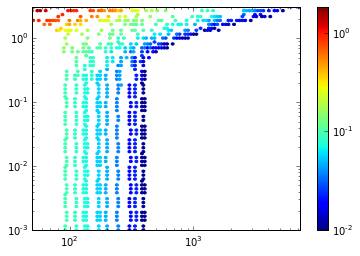

In [269]:
df=df[df.MF>=100]
plt.hexbin(df.ss,df.Ys1,df.MF/df.ss-1,xscale='log',yscale='log',norm=LogNorm())
plt.colorbar()
plt.xlim(50,df.MF.max())

In [188]:
dff=df[df.MF<300]

(50, 7307.1845499999999)

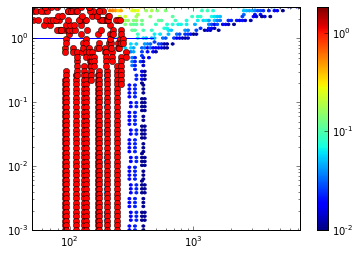

In [189]:
df=df[df.MF>=100]
plt.hexbin(df.ss,df.Ys1,df.MF/df.ss-1,xscale='log',yscale='log',norm=LogNorm())
plt.colorbar()
plt.plot(dff.MF<300)
plt.plot(dff.ss,dff.Ys1,'ro')
plt.xlim(50,df.MF.max())

(0, 350)

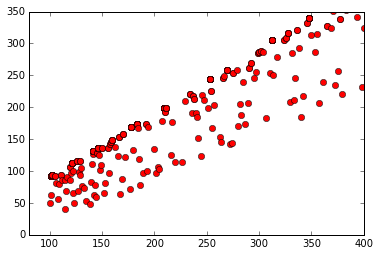

In [272]:
plt.plot(df.MF,df.ss,'ro')
plt.xlim(80,400)
plt.ylim(0,350)

Cross sections

In [251]:
tdo=pd.read_csv('full_data/tau_obs.csv')
tdo[:1]                

,m_stau,cs_exp,cs_obs
0,90.61,6.77,6.77


In [229]:
wd=pd.read_csv('full_data/wino_nlo.csv')
wd[:1]

,m_wino,cs,delta_xs
0,100.0,5.550178,0.360378


In [235]:
hd=pd.read_csv('full_data/higgsino_nlo.csv')
hd[:1]

,m_higgsino,cs,xs_delta
0,98.070115,1.63,0


In [ ]:
xd=pd.read_csv('full_data/d33.cvs')

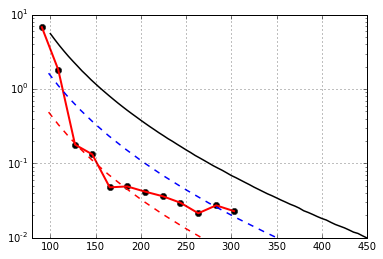

In [254]:
plt.semilogy(tdo.m_stau,tdo.cs_obs,'ko')
plt.semilogy(tdo.m_stau,tdo.cs_obs,'r-', lw=2,  label= r'Observed 95% CL (MVA)')
plt.semilogy(wd.m_wino,wd.cs,'k-',lw=1.5,label= r'$ \sigma( p p \to \psi^{+} \psi^{-})_{\rm{NLO}} $ (pure wino)')
#plt.semilogy(wd.m_wino,wd.cs*0.3,'r-',lw=1.5)
plt.semilogy(hd.m_higgsino,hd.cs,'b--',lw=1.5,label= r'$ \sigma( p p \to \psi^{+} \psi^{-})_{\rm{NLO}} $ (pure higgsino)')
plt.semilogy(hd.m_higgsino,hd.cs*0.3,'r--',lw=1.5,label= r'$ \sigma( p p \to \psi^{+} \psi^{-})_{k} $ (charged singlet)')
plt.xlim(80,450)
plt.ylim(1E-2,1E1)
plt.grid()

In [255]:
400*0.3

120.0

In [226]:
wd['xs']

0     5.550178
1     4.600000
2     3.840278
3     3.240000
4     2.750000
5     2.360000
6     2.035227
7     1.750000
8     1.530000
9     1.330000
10    1.170000
11    1.030500
12    0.913000
13    0.810000
14    0.721000
15    0.643000
16    0.576000
17    0.517000
18    0.466000
19    0.421004
20    0.380000
21    0.344000
22    0.312000
23    0.284000
24    0.258030
25    0.236035
26    0.215000
27    0.197995
28    0.180999
29    0.166000
        ...   
67    0.011922
68    0.011441
69    0.010635
70    0.009939
71    0.009605
72    0.008975
73    0.008404
74    0.008113
75    0.007598
76    0.007112
77    0.005669
78    0.004339
79    0.003418
80    0.002654
81    0.002118
82    0.001591
83    0.001280
84    0.001015
85    0.000823
86    0.000655
87    0.000505
88    0.000405
89    0.000315
90    0.000261
91    0.000211
92    0.000170
93    0.000133
94    0.000113
95    0.000088
96    0.000072
Name: xs, dtype: float64

In [181]:
rm1=r-1
rm1

0.010101010101010166

In [164]:
np.abs((df.ss/df.MF-1)).max()

0.64879097543982955

[![Home](http://www.incredimail.com/images/nav%20bar/home-icon.png)](./) 
[Jupyter home](./draft.pdf)